In [1]:
import sys
import numpy as np
print(sys.version)

import declarative
from phasor.utilities.ipynb.displays import *
from phasor.utilities.ipynb.sympy import *

from phasor import alm

3.5.3 (default, May 10 2017, 15:05:55) 
[GCC 6.3.1 20161221 (Red Hat 6.3.1-1)]
Populating the interactive namespace from numpy and matplotlib
Sympy version:  1.0


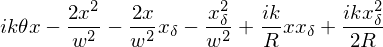

In [440]:
w = sympy.var('w',real = True)
w0 = sympy.var('w_0',real = True)
xd = sympy.var('x_delta',real = True)
x = sympy.var('x',real = True)
theta = sympy.var('theta',real = True)
k = sympy.var('k',real = True)
R = sympy.var('R',real = True)
z0 = sympy.var('z_0',real = True)
zR = sympy.var('z_R',real = True)

ex = -2/w**2 * (x**2 + x * xd + xd**2/2 - sympy.I * k * w**2/2 * (x * xd / R + xd**2/(2 * R) + theta * x))
ex = ex.expand()
ex

In [424]:
a = -ex.coeff(x, 2)
b = ex.coeff(x, 1)
c = ex.coeff(x, 0)

In [425]:
ex2 = sympy.sqrt(2/sympy.pi / w**2) * sympy.sqrt(sympy.pi / a) * sympy.exp(b**2 / (4 * a) + c)

In [426]:
ex2.simplify()

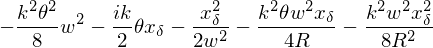

In [427]:
ex2 = b**2 / (4 * a) + c
ex2 = ex2.expand().simplify()
ex2

In [428]:
x12 = ex2.coeff(xd, 1).coeff(theta, 1) / 2
x11 = ex2.coeff(xd, 2).coeff(theta, 0)
x22 = ex2.coeff(xd, 0).coeff(theta, 2)
x12 = sympy.re(x12)
x22 = sympy.re(x22)
x11 = sympy.re(x11)

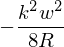

In [429]:
x12

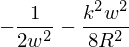

In [430]:
x11

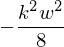

In [431]:
x22

In [432]:
M = sympy.Matrix([[x11, x12], [x12, x22]])
M
v = sympy.Matrix([[xd], [theta]])

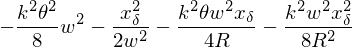

In [433]:
full = v.T * M *v
full[0,0].expand()

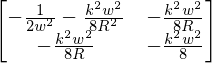

In [434]:
M

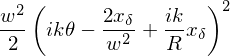

In [435]:
b**2 / a

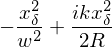

In [422]:
c

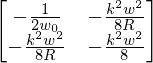

In [439]:
M2 = sympy.Matrix([[-1/(2 * w0), x12], [x12, x22]])
M2

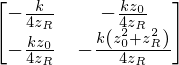

In [448]:
M3 = -k/(4*zR) * sympy.Matrix([[1, z0], [z0, (z0**2 + zR**2)]])
M3